In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

Question 1 :

In [676]:
def analyse_composante_principale_kmeans(path_file: str, start_column_data: int, end_column_data: int, n_clusters: int):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters)
    clustering = kmeans.fit_predict(X_pca[:, :2]) 
    
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal avec clustering K-Means")
    plt.show()

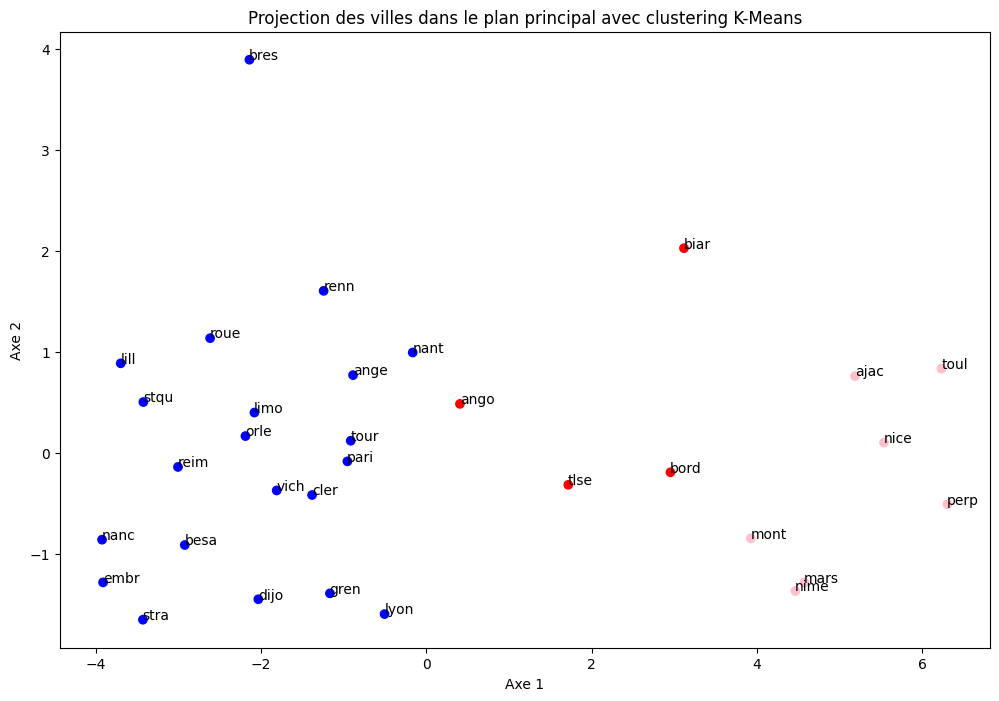

In [677]:
analyse_composante_principale_kmeans('data/villes.csv', 1, 13, 3)

Question 2 :

In [678]:
def analyse_composante_principale_agglomerative_clustering(path_file: str, start_column_data: int, end_column_data: int, n_clusters: int, linkage: str):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    aggloClust = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clustering = aggloClust.fit_predict(X_pca[:, :2]) 
    
    colors = ['red','yellow','blue','pink']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection des villes dans le plan principal avec CAH")
    plt.show()

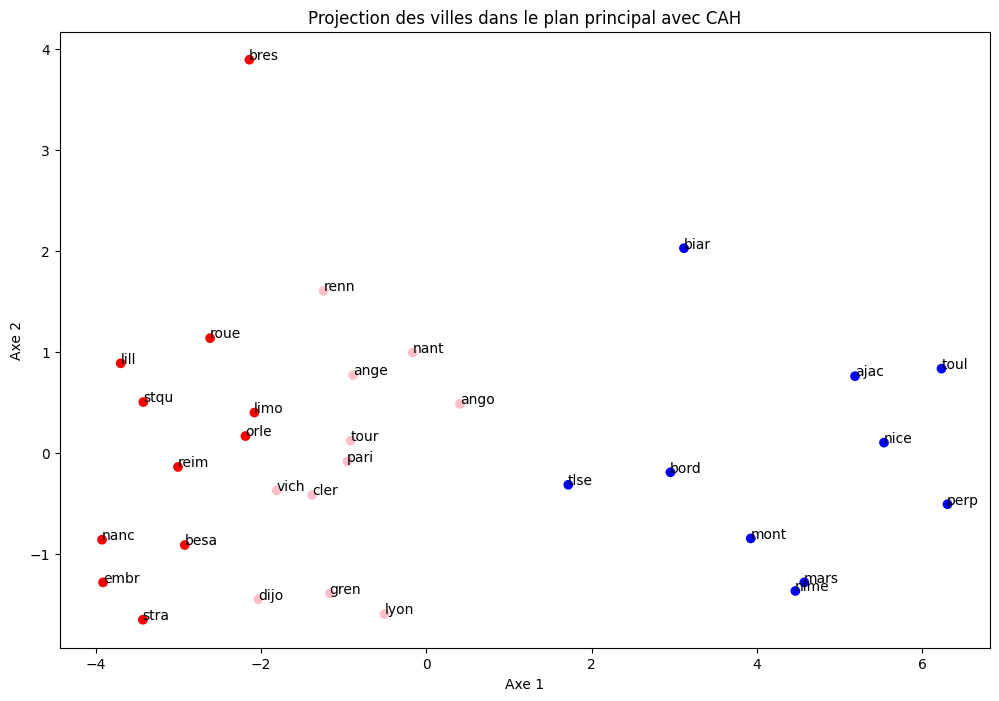

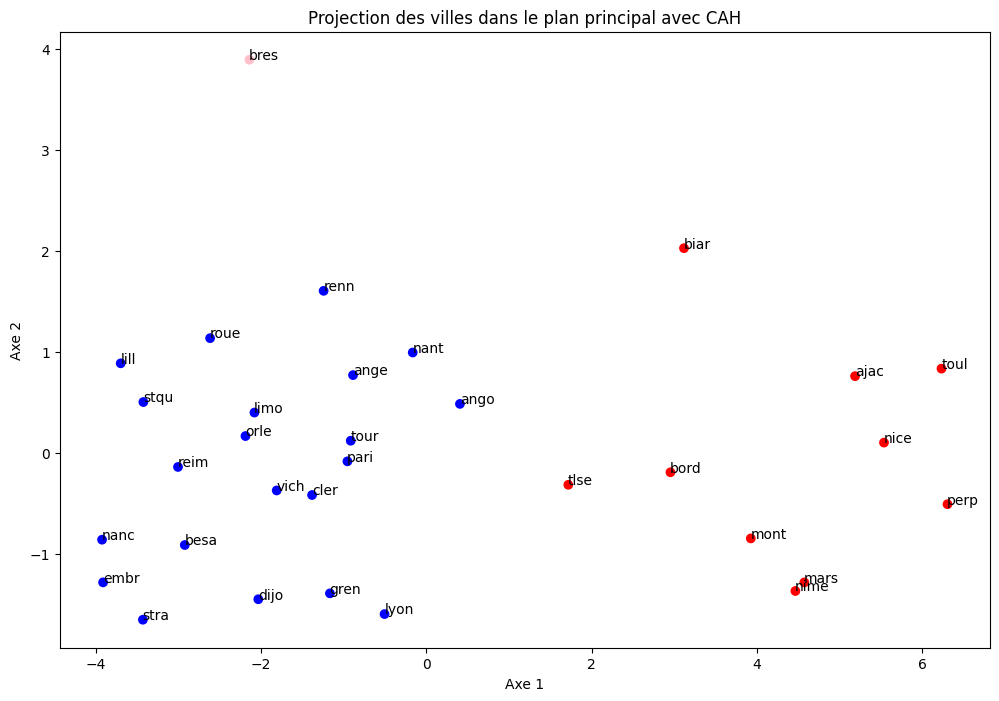

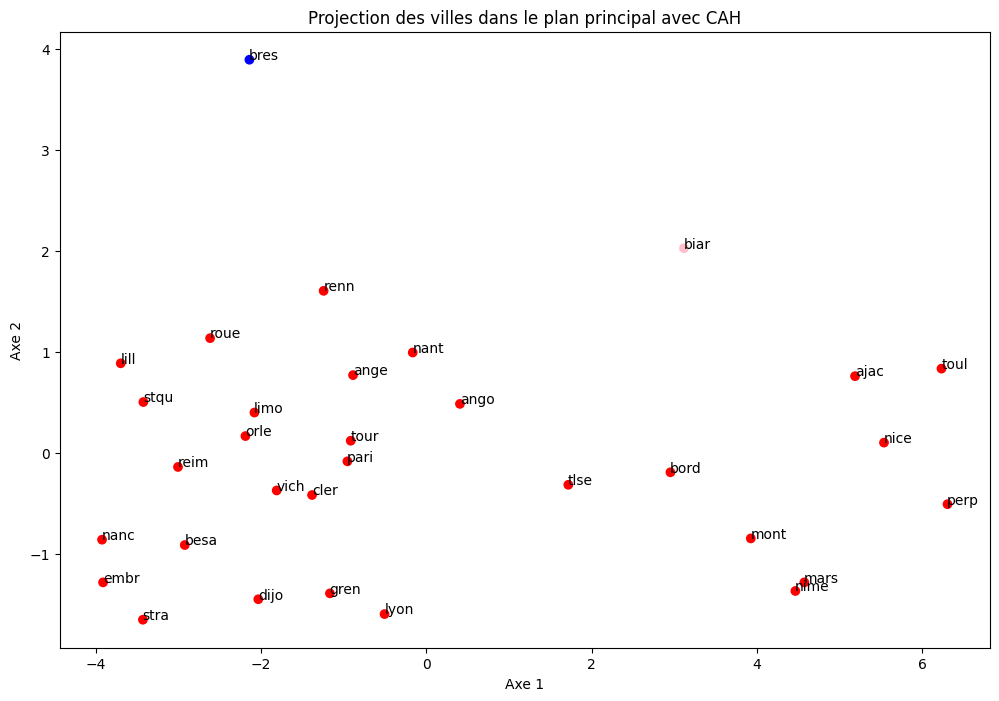

In [679]:
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "ward")
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "average")
analyse_composante_principale_agglomerative_clustering('data/villes.csv', 1, 13, 3, "single")

Question 3 :

In [680]:
def silouhette_clusters_kmeans(path_file: str, start_column_data: int, end_column_data: int):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    best_n_clusters = 2
    best_score = -1
    silhouette_scores = []
    
    
    for n_clusters in range(2, 7):
        kmeans = KMeans(n_clusters=n_clusters)
        clustering = kmeans.fit_predict(X_pca[:, :2])
        score = silhouette_score(X_pca[:, :2], clustering)
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_clusetering = clustering
    
    print(f"Meilleur nombre de clusters selon l'indice de Silhouette: {best_n_clusters} avec un score de {best_score}")

    colors = ['red','yellow','blue','pink','green']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_clusetering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title(f"Projection des villes avec la meilleure partition K-Means ({best_n_clusters} clusters)")
    plt.show()

Meilleur nombre de clusters selon l'indice de Silhouette: 2 avec un score de 0.6341345030494505


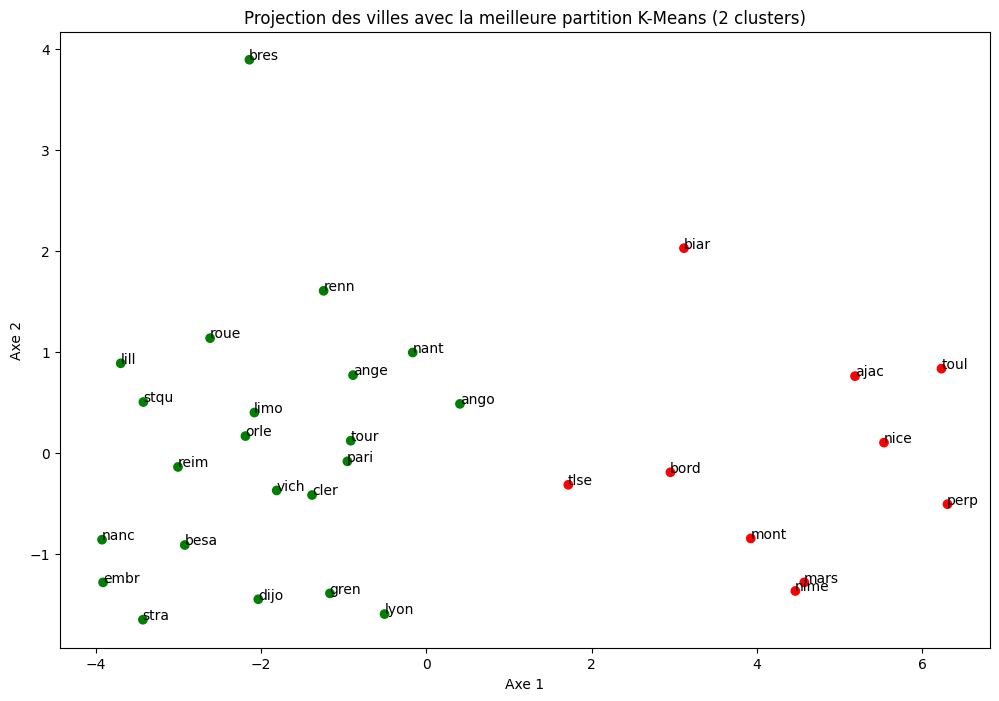

In [681]:
silouhette_clusters_kmeans('data/villes.csv', 1, 13)

Question 4 :

In [682]:
def silouhette_clusters_agglomerative_clustering(path_file: str, start_column_data: int, end_column_data: int, linkage: str):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    best_n_clusters = 2
    best_score = -1
    silhouette_scores = []
    
    
    for n_clusters in range(2, 7):
        aggloClust = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        clustering = aggloClust.fit_predict(X_pca[:, :2])
        score = silhouette_score(X_pca[:, :2], clustering)
        print("k =", n_clusters, ":", score)
        silhouette_scores.append(score)
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_clusetering = clustering
    
    print(f"Meilleur nombre de clusters selon l'indice de Silhouette: {best_n_clusters} avec un score de {best_score}")

    colors = ['red','yellow','blue','pink','green']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_clusetering, cmap=matplotlib.colors.ListedColormap(colors))
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title(f"Projection des villes avec la meilleure partition CAH ({best_n_clusters} clusters)")
    plt.show()

k = 2 : 0.6341345030494505
k = 3 : 0.38153739898102407
k = 4 : 0.39714842885060403
k = 5 : 0.3455124588793176
k = 6 : 0.3390578944927678
Meilleur nombre de clusters selon l'indice de Silhouette: 2 avec un score de 0.6341345030494505


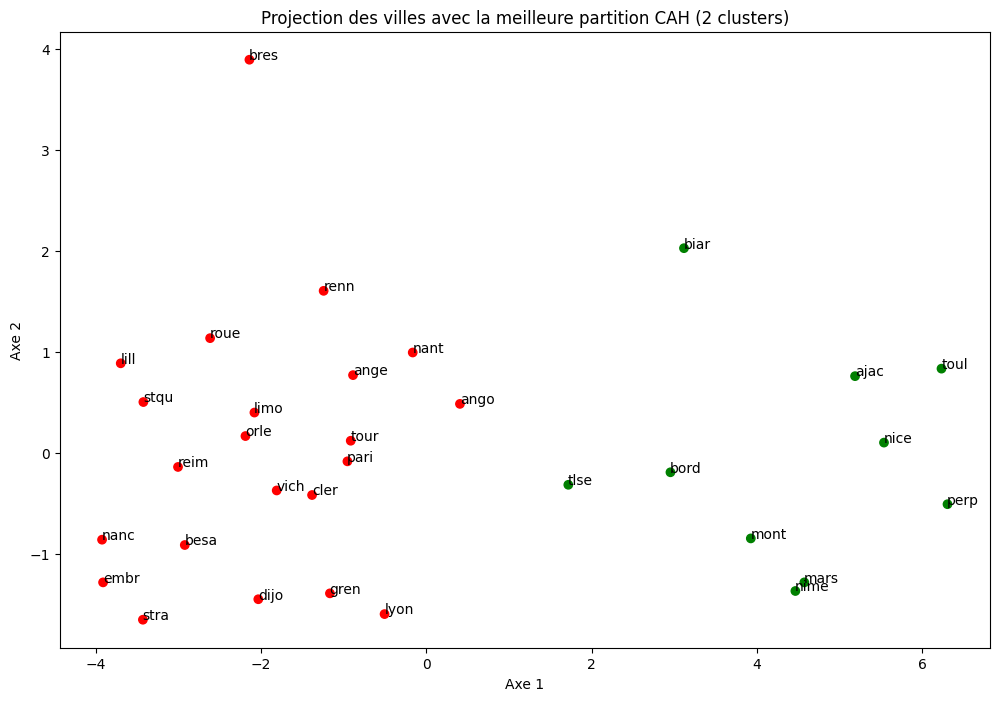

k = 2 : 0.6341345030494505
k = 3 : 0.5067547529956746
k = 4 : 0.4128086230188496
k = 5 : 0.3528957440943905
k = 6 : 0.33198554204098685
Meilleur nombre de clusters selon l'indice de Silhouette: 2 avec un score de 0.6341345030494505


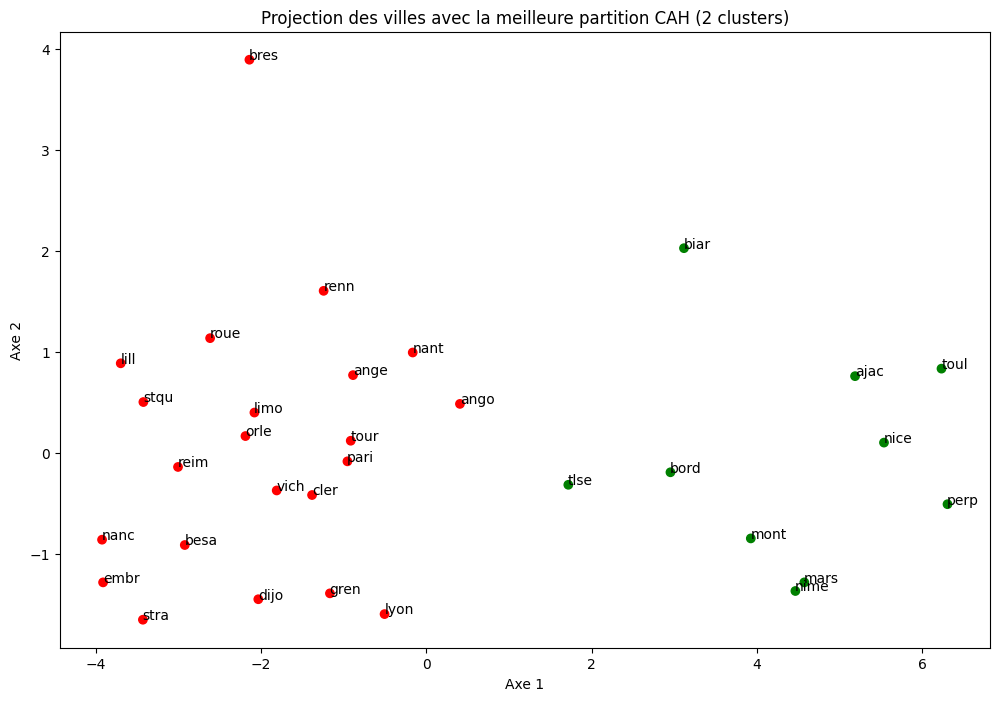

k = 2 : 0.18399880470222785
k = 3 : -0.031653255100035936
k = 4 : 0.19179612541232938
k = 5 : 0.4239495102027069
k = 6 : 0.33583479131614485
Meilleur nombre de clusters selon l'indice de Silhouette: 5 avec un score de 0.4239495102027069


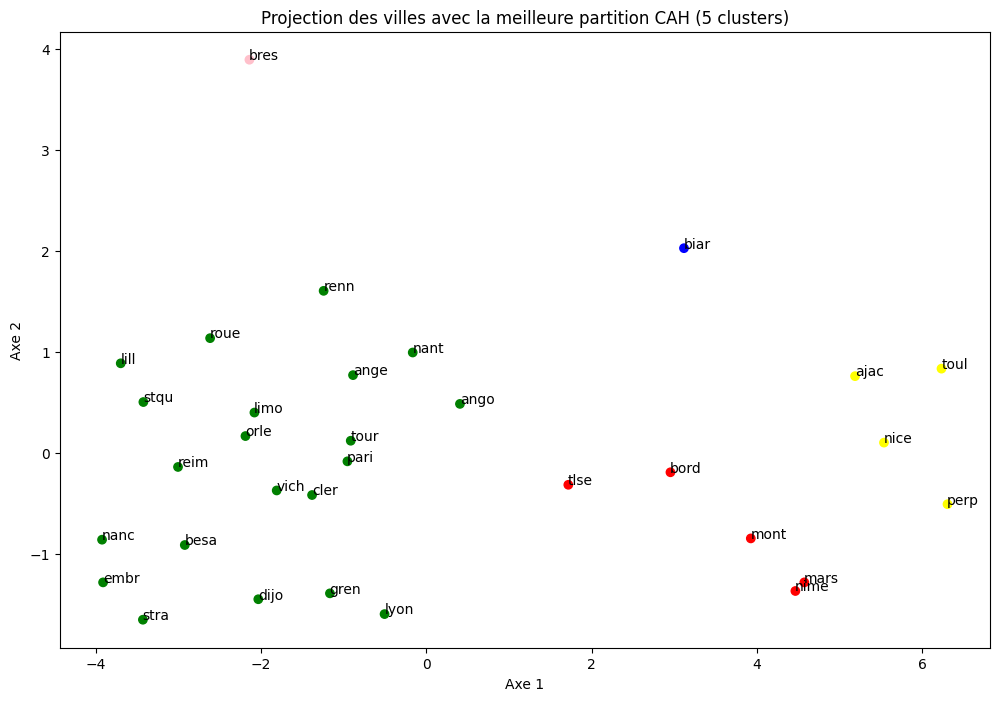

In [683]:
silouhette_clusters_agglomerative_clustering('data/villes.csv', 1, 13, "ward")
silouhette_clusters_agglomerative_clustering('data/villes.csv', 1, 13, "average")
silouhette_clusters_agglomerative_clustering('data/villes.csv', 1, 13, "single")

Question 6 : 

L'avantage de la méthode K-Means et la rapidité mais ses inconvénients sont qu'il risque de ne pas trouver la solution optimal notamment parce qu'on définit à l'avance le nombre de centre. De plus, un groupe risque de se vider en cours de recherche.

L'avantage de la méthode CAH est qu'il trouve la solution optimale notamment en choisissant le meilleur nombre de centre mais il est plus lent que le K-Means.

In [684]:
def analyse_composante_principale_hybride(path_file: str, start_column_data: int, end_column_data: int, n_clusters_kmeans: int = 10, n_clusters_cah: int = 3):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    labels = data.iloc[:, 0].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    kmeans_10 = KMeans(n_clusters=n_clusters_kmeans)
    kmeans_10.fit_predict(X_pca[:, :2])
    centers_kmean = kmeans_10.cluster_centers_

    cah = AgglomerativeClustering(n_clusters=n_clusters_cah, linkage='ward')
    cah_clusters = cah.fit_predict(centers_kmean)

    final_centers = np.array([centers_kmean[cah_clusters == i].mean(axis=0) for i in range(n_clusters_cah)])

    kmeans_final = KMeans(n_clusters=n_clusters_cah, init=final_centers, n_init=1)
    clustering_final = kmeans_final.fit_predict(X_pca[:, :2])

    colors = ['red', 'yellow', 'orange']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_final, cmap=matplotlib.colors.ListedColormap(colors), edgecolors='k')
    
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):  
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')  

    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection ACP avec clustering hybride")
    plt.show()


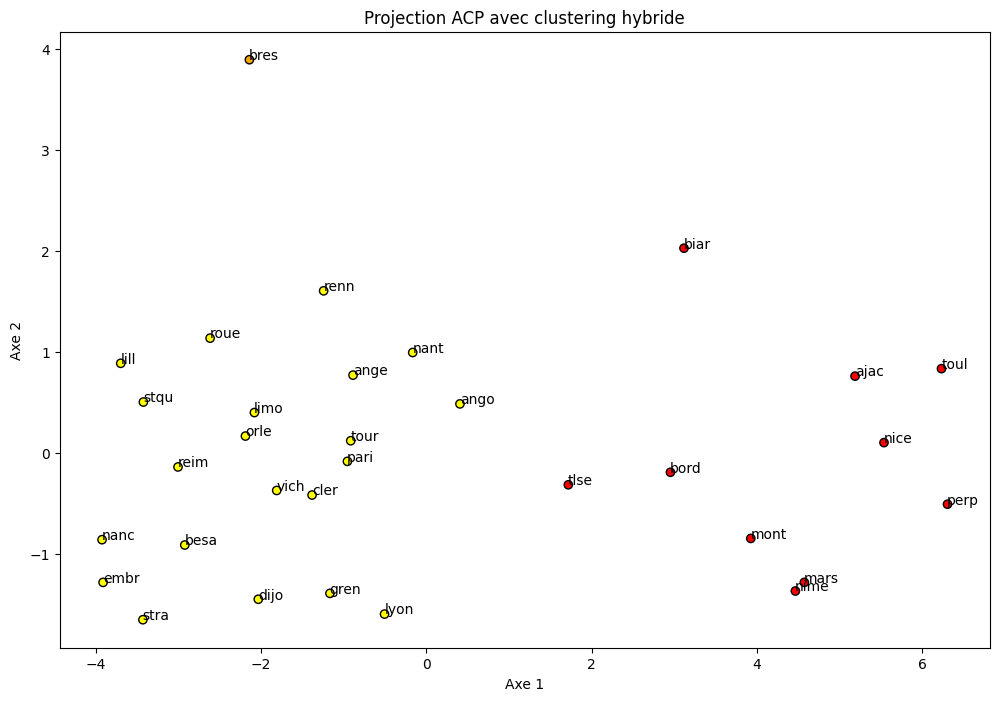

In [685]:
analyse_composante_principale_hybride('data/villes.csv', 1, 13)

In [686]:
def analyse_composante_principale_hybride_nolabels(path_file: str, start_column_data: int, end_column_data: int, n_clusters_kmeans: int = 10, n_clusters_cah: int = 3):
    data = pd.read_csv(path_file, sep=';')
    X = data.iloc[:, start_column_data:end_column_data].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    kmeans_10 = KMeans(n_clusters=n_clusters_kmeans)
    kmeans_10.fit_predict(X_pca[:, :2])
    centers_kmean = kmeans_10.cluster_centers_

    cah = AgglomerativeClustering(n_clusters=n_clusters_cah, linkage='ward')
    cah_clusters = cah.fit_predict(centers_kmean)

    final_centers = np.array([centers_kmean[cah_clusters == i].mean(axis=0) for i in range(n_clusters_cah)])

    kmeans_final = KMeans(n_clusters=n_clusters_cah, init=final_centers, n_init=1)
    clustering_final = kmeans_final.fit_predict(X_pca[:, :2])

    colors = ['red', 'yellow', 'orange']
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering_final, cmap=matplotlib.colors.ListedColormap(colors), edgecolors='k')

    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.title("Projection ACP avec clustering hybride")
    plt.show()


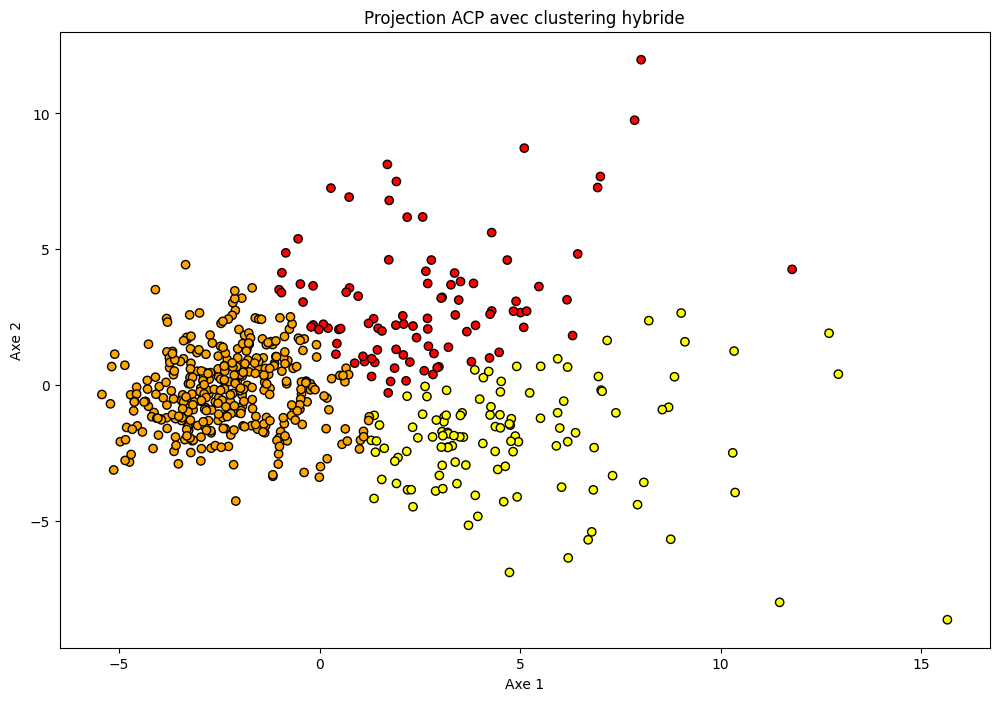

In [687]:
analyse_composante_principale_hybride_nolabels('data/wdbc.csv', 1, 31)

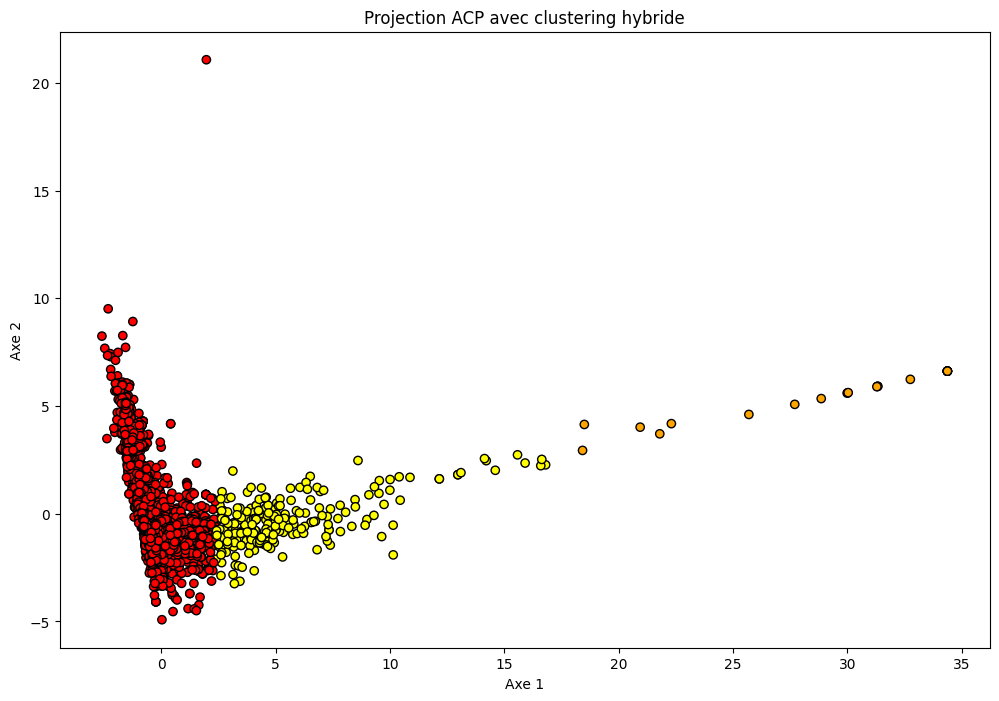

In [688]:
analyse_composante_principale_hybride_nolabels('data/spamb.csv', 1, 58)